# Córdoba Python Meetup  


### Viernes 17 de marzo de 2017

![](imgs/pajaritoserpiente.png)

# Intro
## Idea original

- Recomendador *personalizado* de artículos basado en contenido ( NLP )
- Mejorarlo con información social ( de fuentes externas o relaciones *inferidas* ) 
- Preferencias de usuarios de Cogfor

![](imgs/cogfor.png)

# Intro
## Mutación

- Set the datos propio ( usuarios, preferencias, conexiones ) 
- Predecir preferencias usando información social
- Combinar con recomendación basada en contenido


# Intro
## Menú de hoy
- Set the datos propio ( usuarios, preferencias, conexiones ) 
- Predecir preferencias usando información social
- ~~Combinar con recomendación basada en contenido~~


# Herramientas
![](imgs/tweepy.png)
![](imgs/sqlalchemy.png)
![](imgs/sklearn.png)
![](imgs/networkx.png)
![](imgs/graphtool.png)
![](imgs/pandas.png)
![](imgs/jupyter.png)


# Datos: Grafo social

- hasta 3 pasos de la relación **seguir** empezando de mí mismo
- filtramos usuarios **relevantes** ( >40 seguidos/seguidores )
- 3M usuarios
- 10M conexiones


# Datos: Contenido
- Subgrafo:
    - partimos de un conjunto pequeño de usuarios
    - agregamos 50 *seguidos* más *afines* ( según *seguidos* en común )
    - repetimos hasta que no hay nuevos
- 5180 usuarios


# Datos: Contenido

- *timelines* de 2 meses (+ *retweets* y *favs*)
- 2M tweets

# Experimento

¿ Dado un usuario, cuanto puedo saber de sus preferencias sabiendo las de su entorno ?

- **Contenido** =  tweets en español
- **Preferencias** = retweets
- **Entorno** = seguidos + seguidos-por-seguidos
- **Usuarios** = más activos y más centrales ( ~200 )
- **Clasificador** = *RandomForest*


In [4]:
from experiments.datasets import *
uid = 228252737
X_train, X_test, y_train, y_test = load_dataframe(uid)
X_train.shape

(155904, 625)

In [5]:
X_train.head()

,129102317,214242743,449712065,28631631,157227260,49846983,153932567,150067746,563863289,205088752,...,18430415,213261375,151299316,175914955,913020996,181331362,82088561,146054202,215872828,153169998
638883041042145280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642016953385676802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636343628365963264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640971342804856836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637701998658367488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Matrices bastante *ralas*
X_train.sum().sum() / (X_train.shape[0] * X_train.shape[1])

0.0017730603448275861

In [ ]:
# Balanceando clases
w1 = sum(y_train)/len(y_train)
w0 = 1 - w1
sample_weights = np.array([w0 if x==0 else w1 for x in y_train])

# Entrenamos clasificador
clf = RandomForestClassifier()     
clf.fit(X_train, y_train, sample_weight=sample_weights)

In [12]:
# Y evaluamos...
from sklearn.metrics import classification_report
def evaluate_model(clf, X_train, X_test, y_train, y_test):
    y_true, y_pred = y_train, clf.predict(X_train)

    print("Detailed classification report:\n")
    print("Scores on training set.\n")
    print(classification_report(y_true, y_pred))

    y_true, y_pred = y_test, clf.predict(X_test)
    print("Scores on test set.\n")
    print(classification_report(y_true, y_pred))

evaluate_model(clf, X_train, X_test, y_train, y_test)

Detailed classification report:

Scores on training set.

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    154277
        1.0       1.00      0.81      0.90      1627

avg / total       1.00      1.00      1.00    155904

Scores on test set.

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     66153
        1.0       0.96      0.76      0.85       664

avg / total       1.00      1.00      1.00     66817



# ¿Qué pasó con los demás?

- En general los mismos buenos resultados
- El punto crucial es el *recall* de la clase positiva

In [15]:
import json
with open('../experiments/_1_one_user_learn_neighbours/recalls_test_amb.json') as f:
    recalls = json.load(f).values()

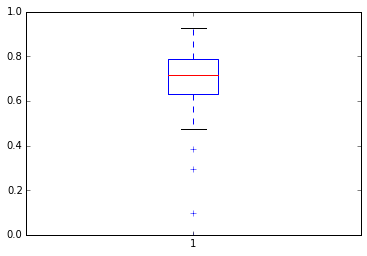

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(recalls)
plt.show()

# Próximos pasos

- generalizar ( modelo que no dependa del usuario )
- combinar con modelos basados en contenido
- considerar temporalidad
- multilingüe

# ¿Preguntas?

![](imgs/twitter.png) @PCelayes

![](imgs/github.jpg) https://github.com/pablocelayes/sna_classifier

